<a href="https://colab.research.google.com/github/not-sid-29/building-scratch-neural-nets/blob/main/Scratch_Linear_Models_and_Basic_Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up a Linear Model and a Neural Network from scratch:



*   Dataset used: Titanic dataset(kaggle)<br>
   **link**: [Titanic Survival dataset](https://www.kaggle.com/competitions/titanic/data)




In [ ]:
!pip install kaggle --q

In [ ]:
mkdir ~/.kaggle

In [ ]:
mv /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
#chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Checking Environment:

import os
from pathlib import Path

#Checking if we are presently working on kaggle:
is_kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if is_kaggle:
  #set path to the dataset
  path = Path("../input/titanic")

else:
  #dowload the dataset using kaggle API:
  path = Path('titanic')

  #Checking if path is valid:
  if not path.exists():
    import zipfile, kaggle
    kaggle.api.competition_download_cli(str(path))

    #Extracting the Zipfile:
    zipfile.ZipFile(f'{path}.zip').extractall(path)

100%|██████████| 34.1k/34.1k [00:00<00:00, 2.27MB/s]

In [ ]:
#Setting up numpy and pytorch for our mathematical operations on the dataset

import torch, numpy as np, pandas as pd

np.set_printoptions(linewidth = 150)
torch.set_printoptions(linewidth = 150, sci_mode=False, edgeitems = 7)
pd.set_option('display.width', 150)

## Loading up the data:

In [ ]:
df = pd.read_csv(path/'train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Checking for Null values in the dataset:

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Inference**: <br>

*   `Age` column has 177 NaN values<br>

*   `Cabin` column has 687 NaN values<br>

*   `Embarked` column has 2 NaN values



**Handling missing data**:<br>

- Filling in the Nan spots with the mode of the column itself

In [ ]:
modes = df.mode().iloc[0] #grabs only the top most layer of occuring entries
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [ ]:
#filling missing values with Mode:

df.fillna(modes, inplace=True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Summary of the dataset**:

In [ ]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Plotting Histogram for the Fares Distribution**:

<Axes: >

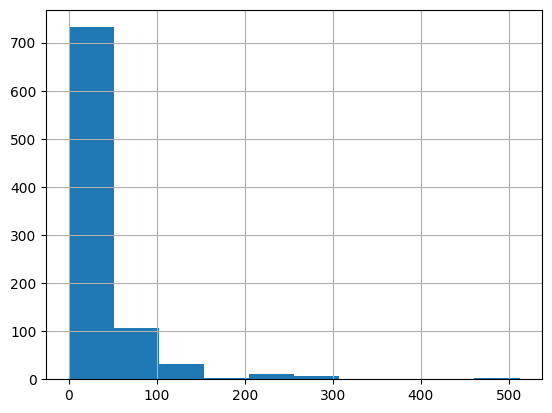

In [ ]:
df['Fare'].hist()

- The distribution suggests that, most of the fares range from $0-$50,<br>
- Since the data is not distributed in a centric fashion, the model that we will build might encounter a high bias.

**Normalizing the data distribution**[Logarithmic Normalization]

In [ ]:
#adding a new feature to the data:

df['log_Fare'] = np.log(df['Fare']+1)

<Axes: >

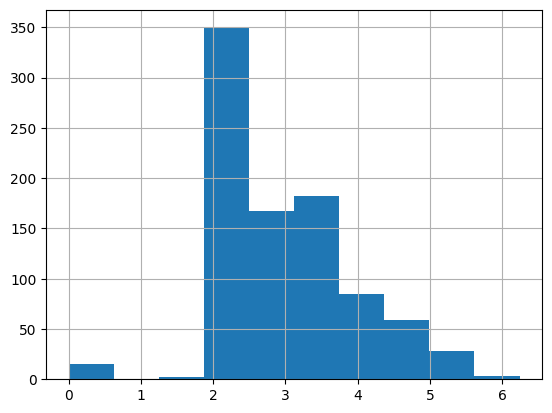

In [ ]:
#Plotting histogram for the normalized fare:

df['log_Fare'].hist()

- The data is now centrally distributed.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  log_Fare     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


## Handling Categorical Features:

**What features do contain categorical data:**<br>
1. Sex : [Male | Female]<br>
2. Embarked [S|C|Q]<br>
3. Cabin-type.<br>
4. Pclass [1|2|3]

In [ ]:
pclass = sorted(df.Pclass.unique())
print(pclass)

[1, 2, 3]


*Summary of categorical data*:

In [ ]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [ ]:
#Creating dummy variables to perform encoding on the categorical data:

df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True) #to avoid high collinearity

df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'log_Fare', 'Sex_male', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
new_cols = ['Sex_male', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S']

df[new_cols].head(5)

,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,1,0,1
1,0,0,0,0,0
2,0,0,1,0,1
3,0,0,0,0,1
4,1,0,1,0,1


# Splitting data



*   Target/Dependent var: 'Survived'
*   Independent features: 'Age', 'SibSp', 'Parch','log_fare''Sex_male', 'Pclass_2', 'Pclass_3',
'Embarked_Q', 'Embarked_S'



In [ ]:
from torch import tensor
target = tensor(df.Survived)  #Target Variable

In [ ]:
indep_features = ['Age', 'SibSp', 'Parch', 'log_Fare']+new_cols

inp_feat = tensor(df[indep_features].values, dtype=torch.float)
print(inp_feat)

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  1.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000],
        [27.0000,  0.0000,  0.0000,  2.6391,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [19.0000,  0.0000,  0.0000,  3.4340,  0.0000,  0.0000,  0.0000,  0.00

In [ ]:
print(target.shape)
print(inp_feat.shape)

torch.Size([891])
torch.Size([891, 9])


# Building a Linear Model from Scratch:

In [ ]:
#setting a seed to reproduce same results when this script is re-run.

torch.manual_seed(551)

n_coef = inp_feat.shape[1]
coefficients = torch.rand(n_coef) - 0.5   #[Clipping our random values from a range of -0.5 to +0.5]
coefficients

tensor([ 0.3564, -0.0750,  0.1264,  0.3433,  0.2940,  0.3705,  0.0463,  0.2453, -0.1740])

In [ ]:
inp_feat * coefficients

tensor([[ 7.8407, -0.0750,  0.0000,  0.7243,  0.2940,  0.0000,  0.0463,  0.0000, -0.1740],
        [13.5431, -0.0750,  0.0000,  1.4693,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000],
        [ 9.2663, -0.0000,  0.0000,  0.7513,  0.0000,  0.0000,  0.0463,  0.0000, -0.1740],
        [12.4739, -0.0750,  0.0000,  1.3699,  0.0000,  0.0000,  0.0000,  0.0000, -0.1740],
        [12.4739, -0.0000,  0.0000,  0.7561,  0.2940,  0.0000,  0.0463,  0.0000, -0.1740],
        [ 8.5535, -0.0000,  0.0000,  0.7713,  0.2940,  0.0000,  0.0463,  0.2453, -0.0000],
        [19.2455, -0.0000,  0.0000,  1.3619,  0.2940,  0.0000,  0.0000,  0.0000, -0.1740],
        ...,
        [ 8.9099, -0.0000,  0.0000,  0.7159,  0.2940,  0.0000,  0.0463,  0.0000, -0.1740],
        [13.8995, -0.0000,  0.6321,  1.1689,  0.0000,  0.0000,  0.0463,  0.2453, -0.0000],
        [ 9.6227, -0.0000,  0.0000,  0.9059,  0.2940,  0.3705,  0.0000,  0.0000, -0.1740],
        [ 6.7716, -0.0000,  0.0000,  1.1787,  0.0000,  0.0000,  0.0000,  0.00

This resembles the Linear Equation: 𝒴 = 𝖒𝒳

In the above matrix, we see the `column_2` which is the feature: `Age`, dominate most of the matrix.<br>
Hence, it creates a high variance.<br>
<br>
Scaling the data.

In [ ]:
#Scaling the data in the Range of [0,1] by dividing each data entry by the max value in the column.


maxi, indices = inp_feat.max(dim=0)
inp_feat = inp_feat/maxi

In [ ]:
inp_feat * coefficients

tensor([[ 0.0980, -0.0094,  0.0000,  0.1161,  0.2940,  0.0000,  0.0463,  0.0000, -0.1740],
        [ 0.1693, -0.0094,  0.0000,  0.2354,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000],
        [ 0.1158, -0.0000,  0.0000,  0.1204,  0.0000,  0.0000,  0.0463,  0.0000, -0.1740],
        [ 0.1559, -0.0094,  0.0000,  0.2195,  0.0000,  0.0000,  0.0000,  0.0000, -0.1740],
        [ 0.1559, -0.0000,  0.0000,  0.1212,  0.2940,  0.0000,  0.0463,  0.0000, -0.1740],
        [ 0.1069, -0.0000,  0.0000,  0.1236,  0.2940,  0.0000,  0.0463,  0.2453, -0.0000],
        [ 0.2406, -0.0000,  0.0000,  0.2182,  0.2940,  0.0000,  0.0000,  0.0000, -0.1740],
        ...,
        [ 0.1114, -0.0000,  0.0000,  0.1147,  0.2940,  0.0000,  0.0463,  0.0000, -0.1740],
        [ 0.1737, -0.0000,  0.1053,  0.1873,  0.0000,  0.0000,  0.0463,  0.2453, -0.0000],
        [ 0.1203, -0.0000,  0.0000,  0.1452,  0.2940,  0.3705,  0.0000,  0.0000, -0.1740],
        [ 0.0846, -0.0000,  0.0000,  0.1889,  0.0000,  0.0000,  0.0000,  0.00

In [ ]:
#Predicting the values using the linear model

prediction = (inp_feat * coefficients).sum(axis=1)
prediction[:15]

tensor([0.3710, 0.3954, 0.1085, 0.1920, 0.4434, 0.8161, 0.5788, 0.3383, 0.1720, 0.6125, 0.0599, 0.2668, 0.3765, 0.6271, 0.0546])

- **Creating a Loss Function:**

In [ ]:
loss = torch.abs(prediction - target).mean()
loss

tensor(0.5360)

In [ ]:
#Creating helper functions:

#1. Prediction Functions
def func_predict(coefficients, independents):
  return (independents * coefficients).sum(axis=1)


#2. Loss Function:
def func_loss(coefficients, independents, dependents):
  return torch.abs(func_predict(coefficients, independents)-dependents).mean()

# Adding Gradient Descent into our Linear Model:

**Gradient Descent:** adding a gradient descent step to manually do 1-epoch training of the model that has been used previously.

In [ ]:
coefficients.requires_grad_()

tensor([ 0.3564, -0.0750,  0.1264,  0.3433,  0.2940,  0.3705,  0.0463,  0.2453, -0.1740], requires_grad=True)

In [ ]:
loss = func_loss(coefficients, inp_feat, target)
loss

tensor(0.5360, grad_fn=<MeanBackward0>)

In [ ]:
#calculating the gradients using backwards()

loss.backward()

In [ ]:
coefficients.grad

tensor([0.0914, 0.0199, 0.0041, 0.0605, 0.4029, 0.0112, 0.2840, 0.0191, 0.2334])

*side note:* Whenever multiple times the grad function is called, newer gradients are added onto the coefficients. Thus we need to reset it to 0

In [ ]:
loss = func_loss(coefficients, inp_feat, target)
loss.backward()
with torch.no_grad():
  coefficients.sub_(coefficients.grad * 0.1)
  coefficients.grad.zero_()
  print(func_loss(coefficients, inp_feat, target))


tensor(0.4753)




*   Old Loss: `0.5360`
*   New Loss: `0.5014`



# Training the Linear Model:

- Creating Training and Validation splits from the dataset:

In [ ]:
from fastai.data.transforms import RandomSplitter

In [ ]:
train_split, valid_split = RandomSplitter(seed=400)(df)

In [ ]:
train_indep, val_indep = inp_feat[train_split], inp_feat[valid_split]

train_dep, val_dep = target[train_split], target[valid_split]

**Creating helper functions:**

In [ ]:
def init_coefs():
  print(n_coef)
  return (torch.rand(n_coef)-0.5).requires_grad_()

In [ ]:
def update_coefs(coeffs, lr):
  coeffs.sub_(coeffs.grad * lr)
  coeffs.grad.zero_()

In [ ]:
def one_epoch(coeffs, lr):
  loss = func_loss(coeffs, train_indep, train_dep)
  loss.backward()

  with torch.no_grad():
    update_coefs(coeffs, lr)
    print(f'{loss:.3f}', end = " ")


In [ ]:
def training_func(epochs = 25, lr = 0.01):
  torch.manual_seed(450)
  coeffs = init_coefs()
  for i in range(epochs):
    one_epoch(coeffs, lr)
  return coeffs


In [ ]:
#print(len(train_indep))
#print(len(train_dep))

In [ ]:
coeffs = training_func(epochs=45, lr=0.4)

9
0.624 0.510 0.453 0.436 0.501 0.414 0.480 0.413 0.505 0.390 0.451 0.526 0.401 0.454 0.479 0.367 0.405 0.440 0.367 0.422 0.371 0.425 0.355 0.415 0.351 0.409 0.345 0.399 0.344 0.405 0.330 0.382 0.341 0.399 0.328 0.388 0.328 0.389 0.327 0.392 0.326 0.395 0.324 0.397 0.322 



*   First Loss: 0.5360
*   Second-loss(with grad descent): 0.5104
*   Third loss(with multi-epoch training): 0.423[with 20 epochs]
*           " "" ""                      : 0.322[with 45 epochs]



*   Checking which feature is impacting our model in what way:

In [ ]:
def show_coeffs():
  return dict(zip(indep_features, coeffs.requires_grad_(False)))

In [ ]:
show_coeffs()

{'Age': tensor(0.4225),
 'SibSp': tensor(-0.2459),
 'Parch': tensor(0.3005),
 'log_Fare': tensor(0.8812),
 'Sex_male': tensor(-0.5914),
 'Pclass_2': tensor(0.1874),
 'Pclass_3': tensor(0.2415),
 'Embarked_Q': tensor(0.2057),
 'Embarked_S': tensor(0.2179)}

# Evaluating model performance:

In [ ]:
preds = func_predict(coeffs, val_indep)

In [ ]:
results = val_dep.bool()==(preds>0.5)
results[:10]

tensor([ True, False,  True,  True, False,  True,  True,  True,  True,  True])

In [ ]:
#Calculating avg accuracy:

results.float().mean()

tensor(0.8090)

In [ ]:
#Accuracy Function:

def accuracy(coeff):
  return (val_dep.bool() == (func_predict(coeff, val_indep) > 0.5)).float().mean()


In [ ]:
accuracy(coeffs)

tensor(0.8090)

*  Since the output above contains values < 0 and values > 1, but Survival feature contains values of 0 & 1<br>
0 = Not Survived<br>
1 = Survived

## Using Sigmoid Function:

In [ ]:
preds[:30]

tensor([ 0.9057,  0.7020,  0.3759, -0.0593,  0.2591,  0.9861,  0.2453,  0.4463,  0.8354,  0.3033,  0.5722, -0.0167,  0.3925,  0.4116,  0.9878,
         0.2221,  0.9850,  0.9898,  0.2815,  0.9668,  0.3116,  0.4809,  0.8581,  0.7526,  1.0733,  0.3531,  0.4151,  0.3177,  0.3229,  0.3058])

In [ ]:
!pip install sympy

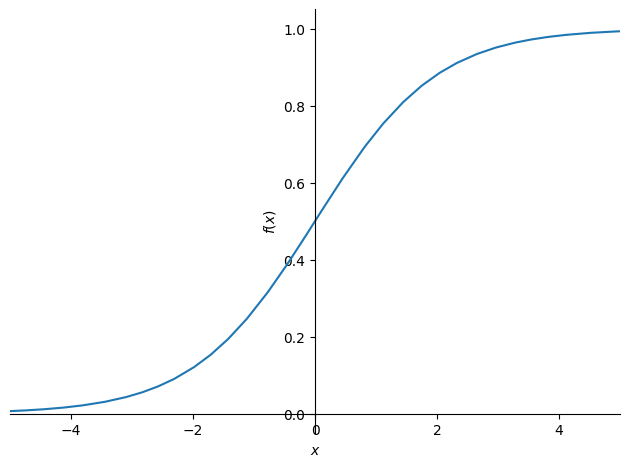

In [ ]:
import sympy

sympy.plot("1/(1+exp(-x))", xlim = (-5, 5))

In [ ]:
def func_predict(coeffs, independents):
  return torch.sigmoid((independents * coeffs).sum(axis=1))


In [ ]:
coeffs = training_func(lr = 110)

9
0.558 0.375 0.373 0.368 0.359 0.345 0.333 0.321 0.279 0.228 0.227 0.227 0.227 0.226 0.226 0.226 0.226 0.226 0.226 0.225 0.225 0.225 0.225 0.225 0.225 

In [ ]:
accuracy(coeffs)

tensor(0.8258)

- Loss after applying Sigmoid: 0.225<br>
- Accuracy after Sigmoid: 0.8258

In [ ]:
show_coeffs()

{'Age': tensor(2.3702),
 'SibSp': tensor(-0.3770),
 'Parch': tensor(0.3730),
 'log_Fare': tensor(6.0637),
 'Sex_male': tensor(-11.1638),
 'Pclass_2': tensor(2.6432),
 'Pclass_3': tensor(-7.2685),
 'Embarked_Q': tensor(-0.1058),
 'Embarked_S': tensor(-0.9401)}

# Using Our Model on the Testing Data:

In [ ]:
test_df = pd.read_csv(path/'test.csv')
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- **Missing values**:<br>


> Age : 86 values<br>


> Fare: 1 value<br>


> Cabin: 327 values







In [ ]:
test_df['Fare'] = test_df.Fare.fillna(0)

In [ ]:
#Preprocessing Test Data:
test_df.fillna(modes, inplace=True)
test_df['log_Fare'] = np.log(test_df['Fare'] + 1)

test_df = pd.get_dummies(test_df, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True)


test_indep = tensor(test_df[indep_features].values, dtype = torch.float)
test_indep = test_indep/maxi

In [ ]:
#Adding the Survived feature:
test_df['Survived'] = (func_predict(test_indep, coeffs)>0.5).int()


In [ ]:
submit_df = test_df[['PassengerId', 'Survived']]
submit_df.to_csv('submit.csv', index=False)

In [ ]:
!head submit.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,0
900,0


# Using Matrix Product:

In [ ]:
# `@` is the operator for matrix multiplication:

val_indep @ coeffs

tensor([ -5.3116,  -4.2781, -15.2308,  -8.7496,  -6.5248,   5.2075, -15.9857,  -5.3549,  -5.6424, -16.5379,  -5.0527, -16.2736,  -5.7411,  -7.1044,
          5.6878,  -4.2661,   5.3693,  -4.6907, -16.6609,  -4.7269,  -5.5748,  -5.0020,   5.3272,   5.0179,   4.7686, -16.2286, -15.5577, -16.4322,
        -16.4303, -16.5212, -15.8241,  -7.2565, -16.1465,  -6.3005,  -4.7928, -14.7247, -16.6703,  -5.4125, -16.6532,   5.7175,  -7.5727,  -7.0117,
         -7.2113,  -5.3218, -16.3286, -16.6100, -16.3437, -16.7882,   4.4061, -15.8249, -16.4953, -16.7051,   3.9272,  -8.1933,  -3.9866,   4.2115,
         -6.3174,  -6.0211,  -4.0494,  -4.4462,  -5.4122, -14.7409,  -4.8005, -16.2976,   4.8745, -16.5212, -16.4786,   3.9269,  -6.2151, -15.7327,
         -4.0916, -16.3686,   5.4212,  -5.5738, -16.6138,  -5.8892,  -6.0077,  -4.8981,  -4.9087,   4.8633, -15.9500,  -5.8597, -15.2508,  -5.1712,
        -15.4606,  -7.2229,   7.0171, -15.5879, -16.3000, -16.5379, -15.9984, -15.2373,  -4.7679,   4.9245,   5.

In [ ]:
#Updating the functions with matrix multiplication:


def func_predict(coeffs, independents):
  return (torch.sigmoid(independents@coeffs))


def init_coefs():
  return (torch.rand(n_coef, 1)*0.1).requires_grad_() #making a coefficient matrix

In [ ]:
#Creating a Target column Matrix:

train_dep = train_dep[:,None]
val_dep = val_dep[:,None]

In [ ]:
coeffs = training_func(lr=110)

0.520 0.376 0.375 0.372 0.367 0.358 0.345 0.335 0.330 0.325 0.313 0.254 0.226 0.226 0.226 0.225 0.225 0.225 0.225 0.225 0.225 0.225 0.225 0.225 0.225 

In [ ]:
accuracy(coeffs)

tensor(0.8258)

# Building a Basic Neural Net:

In [ ]:
def init_coefs(n_hidden = 25):
  layer1 = (torch.rand(n_coef, n_hidden)-0.5)/n_hidden
  layer2 = (torch.rand(n_hidden, 1))-0.45  #final/output layer[hence the size of matrix (n_hidden, 1)]

  constant = torch.rand(1)[0] #Picking up a random constant value.
  return layer1.requires_grad_(), layer2.requires_grad_(), constant.requires_grad_()

In [ ]:
import torch.nn.functional as F

def func_predict(coeffs, independents):
  lay1, lay2, const = coeffs
  res = F.relu(independents @ lay1)  #the hidden layer is passed through ReLU function to clip outputs in a range of [0, n]
  res = res@lay2 + const
  return torch.sigmoid(res)

In [ ]:
def update_coefs(coeffs, lr):
  for layer in coeffs:
    layer.sub_(layer.grad * lr)
    layer.grad.zero_()

In [ ]:
coeffs = training_func(lr=14.50)

0.544 0.464 0.362 0.346 0.323 0.306 0.297 0.295 0.257 0.232 0.226 0.219 0.214 0.212 0.210 0.209 0.208 0.207 0.206 0.205 0.205 0.204 0.204 0.203 0.203 

In [ ]:
accuracy(coeffs)

tensor(0.8371)

#Creating a DNN:

In [ ]:
def init_coefs():
  hidden = [10, 20, 10]
  sizes = [n_coef] + hidden + [1]   #n_coef = input layer; hidden = middle layers; [1] = output layer
  n = len(sizes)

  layers = [(torch.rand(sizes[i], sizes[i+1])-0.4)/sizes[i+1]*5 for i in range(n-1)]
  consts = [(torch.rand(1)[0] - 0.5)*0.1 for i in range(n-1)]

  for lay in layers+consts:
    lay.requires_grad_()

  return layers, consts


In [ ]:
import torch.nn.functional as F

def func_predict(coeffs, independents):
  layers, constants = coeffs
  n = len(layers)
  res = independents

  for i,l in enumerate(layers):
    res = res@l + constants[i]
    if i != n-1:
      res = F.relu(res)
  return torch.sigmoid(res)

In [ ]:
def update_coefs(coeffs, learning_rate):
  layers, constants = coeffs
  for layer in layers+constants:
    layer.sub_(layer.grad * learning_rate)
    layer.grad.zero_()

In [ ]:
coeffs = training_func(lr = 2)

0.496 0.418 0.381 0.381 0.381 0.381 0.380 0.380 0.379 0.378 0.376 0.371 0.363 0.351 0.338 0.327 0.338 0.362 0.583 0.376 0.325 0.406 0.317 0.292 0.234 

In [ ]:
accuracy(coeffs)

tensor(0.8258)